## Reading Data from the STAC API

The Planetary Computer catalogs the datasets we host using the [STAC](http://stacspec.org/) (SpatioTemporal Asset Catalog) specification. We provide a [STAC API](https://github.com/radiantearth/stac-api-spec) endpoint for searching our datasets by space, time, and more. This quickstart will show you how to search for data using our STAC API and open-source Python libraries. To use our STAC API from R, see [Reading data from the STAC API with R](https://planetarycomputer.microsoft.com/docs/quickstarts/reading-stac-r/).

To get started you'll need the [pystac-client](https://github.com/stac-utils/pystac-client) library installed. You can install it via pip:

```
> python -m pip install pystac-client
```

To access the data, we'll create a `pystac_client.Client`. We'll explain the `modifier` part later on, but it's what lets us download the data assets Azure Blob Storage.

In [165]:
import pystac_client
import planetary_computer

catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

### Searching

We can use the STAC API to search for assets meeting some criteria. This might include the date and time the asset covers, is spatial extent, or any other property captured in the STAC item's metadata.

In this example we'll search for imagery from [Landsat Collection 2 Level-2](https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2) area around Microsoft's main campus in December of 2020.

In [166]:
time_range = "2020-12-01/2020-12-31"
bbox = [-122.2751, 47.5469, -121.9613 + 1, 47.7458+1]

search = catalog.search(collections=["landsat-c2-l2"], bbox=bbox, datetime=time_range)
items = search.get_all_items()
len(items)

21

In that example our spatial query used a bounding box with a `bbox`. Alternatively, you can pass a GeoJSON object as `intersects`

```python
area_of_interest = {
    "type": "Polygon",
    "coordinates": [
        [
            [41.217337, -8.527665],
            [41.216595, -8.527701],
            [41.215623, -8.527020],
            [41.216674, -8.526108],
            [41.217337, -8.527665],
        ]
    ],
}

time_range = "2020-12-01/2020-12-31"

search = catalog.search(
    collections=["landsat-c2-l2"], intersects=area_of_interest, datetime=time_range
)
items = search.get_all_items()
```

`items` is a [`pystac.ItemCollection`](https://pystac.readthedocs.io/en/stable/api/item_collection.html#pystac-item-collection). We can see that 4 items matched our search criteria.

In [167]:
len(items)

21

Each [`pystac.Item`](https://pystac.readthedocs.io/en/stable/api/pystac.html#pystac.Item) in this `ItemCollection` includes all the metadata for that scene. [STAC Items](https://github.com/radiantearth/stac-spec/blob/master/item-spec/item-spec.md) are GeoJSON features, and so can be loaded by libraries like [geopandas](http://geopandas.readthedocs.io/).

In [168]:
import geopandas

df = geopandas.GeoDataFrame.from_features(items.to_dict(), crs="epsg:4326")
df

,geometry,gsd,created,sci:doi,datetime,platform,proj:epsg,proj:shape,description,instruments,...,landsat:wrs_row,landsat:scene_id,landsat:wrs_path,landsat:wrs_type,view:sun_azimuth,landsat:correction,view:sun_elevation,landsat:cloud_cover_land,landsat:collection_number,landsat:collection_category
0,"POLYGON ((-121.43008 48.44556, -118.85228 48.0...",30,2022-05-06T17:18:19.914919Z,10.5066/P9C7I13B,2020-12-30T18:08:02.801305Z,landsat-7,32610,"[7141, 8161]",Landsat Collection 2 Level-2,[etm+],...,027,LE70450272020365EDC00,045,2,152.396604,L2SP,14.712063,89.00,02,T2
1,"POLYGON ((-122.72549 48.50884, -120.29248 48.0...",30,2022-05-06T18:04:17.126358Z,10.5066/P9OGBGM6,2020-12-29T18:55:56.738265Z,landsat-8,32610,"[7881, 7781]",Landsat Collection 2 Level-2,"[oli, tirs]",...,027,LC80460272020364LGN00,046,2,162.253231,L2SP,17.458298,100.00,02,T2
2,"POLYGON ((-122.17875 49.92734, -119.67969 49.4...",30,2022-05-06T18:04:12.708177Z,10.5066/P9OGBGM6,2020-12-29T18:55:32.855698Z,landsat-8,32610,"[7861, 7771]",Landsat Collection 2 Level-2,"[oli, tirs]",...,026,LC80460262020364LGN00,046,2,162.815963,L2SP,16.199155,99.99,02,T2
3,"POLYGON ((-124.52046 48.44245, -121.93932 48.0...",30,2022-05-06T17:25:29.626986Z,10.5066/P9C7I13B,2020-12-28T18:20:32.609164Z,landsat-7,32610,"[7361, 8341]",Landsat Collection 2 Level-2,[etm+],...,027,LE70470272020363EDC00,047,2,152.689113,L2SP,14.678880,32.00,02,T1
4,"POLYGON ((-121.18242 48.50777, -118.75073 48.0...",30,2022-05-06T17:11:33.278072Z,10.5066/P9OGBGM6,2020-12-22T18:49:47.832374Z,landsat-8,32610,"[7791, 7681]",Landsat Collection 2 Level-2,"[oli, tirs]",...,027,LC80450272020357LGN00,045,2,163.125412,L2SP,17.371677,14.89,02,T1
5,"POLYGON ((-120.63980 49.92761, -118.13963 49.4...",30,2022-05-06T17:11:28.751347Z,10.5066/P9OGBGM6,2020-12-22T18:49:23.949806Z,landsat-8,32611,"[8131, 8041]",Landsat Collection 2 Level-2,"[oli, tirs]",...,026,LC80450262020357LGN00,045,2,163.681146,L2SP,16.101753,41.76,02,T1
6,"POLYGON ((-122.96802 48.44547, -120.39024 48.0...",30,2022-05-06T18:01:04.319403Z,10.5066/P9C7I13B,2020-12-21T18:14:50.812768Z,landsat-7,32610,"[7251, 8251]",Landsat Collection 2 Level-2,[etm+],...,027,LE70460272020356EDC00,046,2,153.649177,L2SP,14.779612,24.00,02,T2
7,"POLYGON ((-124.27547 48.50831, -121.84167 48.0...",30,2022-05-06T17:46:22.246696Z,10.5066/P9OGBGM6,2020-12-20T19:02:09.878796Z,landsat-8,32610,"[7971, 7861]",Landsat Collection 2 Level-2,"[oli, tirs]",...,027,LC80470272020355LGN00,047,2,163.360118,L2SP,17.414441,100.00,02,T2
8,"POLYGON ((-123.73194 49.92740, -121.23042 49.4...",30,2022-05-06T17:46:18.304294Z,10.5066/P9OGBGM6,2020-12-20T19:01:45.996228Z,landsat-8,32610,"[7961, 7861]",Landsat Collection 2 Level-2,"[oli, tirs]",...,026,LC80470262020355LGN00,047,2,163.914790,L2SP,16.141679,84.52,02,T1
9,"POLYGON ((-121.43170 48.44586, -118.85202 48.0...",30,2022-05-06T17:18:19.733213Z,10.5066/P9C7I13B,2020-12-14T18:09:12.289348Z,landsat-7,32610,"[7171, 8171]",Landsat Collection 2 Level-2,[etm+],...,027,LE70450272020349EDC00,045,2,154.483719,L2SP,15.238458,65.00,02,T1


Some collections implement the `eo` extension, which we can use to sort the items by cloudiness. We'll grab an item with low cloudiness:

In [169]:
selected_item = min(items, key=lambda item: item.properties["eo:cloud_cover"])
print(selected_item)

<Item id=LC08_L2SP_047027_20201204_02_T1>


Each STAC item has one or more [Assets](https://github.com/radiantearth/stac-spec/blob/master/item-spec/item-spec.md#asset-object), which include links to the actual files.

In [170]:
import rich.table

table = rich.table.Table("Asset Key", "Description")
for asset_key, asset in selected_item.assets.items():
    table.add_row(asset_key, asset.title)

table

┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Asset Key        ┃ Description                                                          ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ qa               │ Surface Temperature Quality Assessment Band                          │
│ ang              │ Angle Coefficients File                                              │
│ red              │ Red Band                                                             │
│ blue             │ Blue Band                                                            │
│ drad             │ Downwelled Radiance Band                                             │
│ emis             │ Emissivity Band                                                      │
│ emsd             │ Emissivity Standard Deviation Band                                   │
│ trad             │ Thermal Radiance Band                                                │
│ urad             │ Upwelled Radiance Band                                               │
│ atran            │ Atmospheric Transmittance Band                                       │
│ cdist            │ Cloud Distance Band                                                  │
│ green            │ Green Band                                                           │
│ nir08            │ Near Infrared Band 0.8                                               │
│ lwir11           │ Surface Temperature Band                                             │
│ swir16           │ Short-wave Infrared Band 1.6                                         │
│ swir22           │ Short-wave Infrared Band 2.2                                         │
│ coastal          │ Coastal/Aerosol Band                                                 │
│ mtl.txt          │ Product Metadata File (txt)                                          │
│ mtl.xml          │ Product Metadata File (xml)                                          │
│ mtl.json         │ Product Metadata File (json)                                         │
│ qa_pixel         │ Pixel Quality Assessment Band                                        │
│ qa_radsat        │ Radiometric Saturation and Terrain Occlusion Quality Assessment Band │
│ qa_aerosol       │ Aerosol Quality Assessment Band                                      │
│ tilejson         │ TileJSON with default rendering                                      │
│ rendered_preview │ Rendered preview                                                     │
└──────────────────┴──────────────────────────────────────────────────────────────────────┘

Here, we'll inspect the `rendered_preview` asset.

In [171]:
selected_item.assets["rendered_preview"].to_dict()

{'href': 'https://planetarycomputer.microsoft.com/api/data/v1/item/preview.png?collection=landsat-c2-l2&item=LC08_L2SP_047027_20201204_02_T1&assets=red&assets=green&assets=blue&color_formula=gamma+RGB+2.7%2C+saturation+1.5%2C+sigmoidal+RGB+15+0.55',
 'type': 'image/png',
 'title': 'Rendered preview',
 'rel': 'preview',
 'roles': ['overview']}

In [172]:
from IPython.display import Image

Image(url=selected_item.assets["rendered_preview"].href, width=500)

That `rendered_preview` asset is generated dynamically from the raw data using the Planetary Computer's [data API](http://planetarycomputer.microsoft.com/api/data/v1/). We can access the raw data, stored as Cloud Optimzied GeoTIFFs in Azure Blob Storage, using one of the other assets.

The actual data assets are in *private* [Azure Blob Storage containers](https://docs.microsoft.com/en-us/azure/storage/blobs/storage-blobs-introduction#containers). If forget to pass `modifier=planetary_computer.sign_inplace` or manually sign the item, then you'll get a 404 when trying to access the asset.

That's why we included the `modifier=planetary_computer.sign_inplace` when we created the `pystac_client.Client` earlier. With that, the results returned by pystac-client are automatically signed, so that a token granting access to the file is included in the URL.

In [173]:
selected_item.assets["blue"].href[:250]

'https://landsateuwest.blob.core.windows.net/landsat-c2/level-2/standard/oli-tirs/2020/047/027/LC08_L2SP_047027_20201204_20210313_02_T1/LC08_L2SP_047027_20201204_20210313_02_T1_SR_B2.TIF?st=2022-11-27T21%3A40%3A36Z&se=2022-11-28T22%3A25%3A36Z&sp=rl&sv'

 Everything after the `?` in that URL is a [SAS token](https://docs.microsoft.com/en-us/azure/storage/common/storage-sas-overview) grants access to the data. See https://planetarycomputer.microsoft.com/docs/concepts/sas/ for more on using tokens to access data.

In [174]:
import requests

requests.head(selected_item.assets["blue"].href).status_code

200

The `200` status code indicates that we were able to successfully access the data using the "signed" URL with the SAS token included.

We can load up that single COG using libraries like [rioxarray](https://corteva.github.io/rioxarray/html/rioxarray.html) or [rasterio](https://rasterio.readthedocs.io/en/latest/)

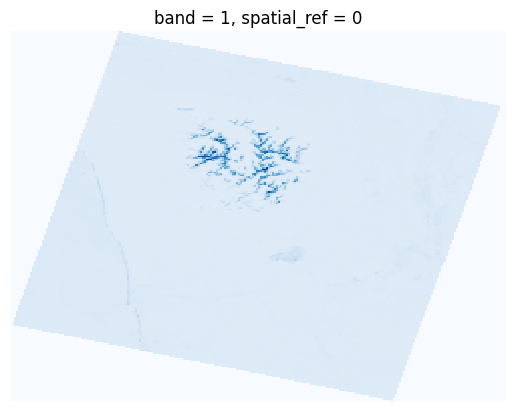

In [175]:
# import xarray as xr
import rioxarray

ds = rioxarray.open_rasterio(
    selected_item.assets["blue"].href, overview_level=4
).squeeze()
img = ds.plot(cmap="Blues", add_colorbar=False)
img.axes.set_axis_off();

If you wish to work with multiple STAC items as a datacube, you can use libraries like [stackstac](https://stackstac.readthedocs.io/) or [odc-stac](https://odc-stac.readthedocs.io/en/latest/index.html).

In [176]:
import stackstac

ds = stackstac.stack(items)
ds

ModuleNotFoundError: No module named 'stackstac'

### Searching on additional properties

Previously, we searched for items by space and time. Because the Planetary Computer's STAC API supports the [query](https://github.com/radiantearth/stac-api-spec/blob/master/fragments/query/README.md) parameter, you can search on additional properties on the STAC item.

For example, collections like `sentinel-2-l2a` and `landsat-c2-l2` both implement the [`eo` STAC extension](https://github.com/stac-extensions/eo) and include an `eo:cloud_cover` property. Use `query={"eo:cloud_cover": {"lt": 20}}` to return only items that are less than 20% cloudy.

In [ ]:
time_range = "2020-12-01/2020-12-31"
bbox = [-122.2751, 47.5469, -121.9613, 47.7458]

search = catalog.search(
    collections=["sentinel-2-l2a"],
    bbox=bbox,
    datetime=time_range,
    query={"eo:cloud_cover": {"lt": 20}},
)
items = search.get_all_items()

Other common uses of the `query` parameter is to filter a collection down to items of a specific type, For example, the [GOES-CMI](https://planetarycomputer.microsoft.com/dataset/goes-cmi) collection includes images from various when the satellite is in various modes, which produces images of either the Full Disk of the earth, the continental United States, or a mesoscale. You can use `goes:image-type` to filter down to just the ones you want.

In [ ]:
search = catalog.search(
    collections=["goes-cmi"],
    bbox=[-67.2729, 25.6000, -61.7999, 27.5423],
    datetime=["2018-09-11T13:00:00Z", "2018-09-11T15:40:00Z"],
    query={"goes:image-type": {"eq": "MESOSCALE"}},
)

### Analyzing STAC Metadata

STAC items are proper GeoJSON Features, and so can be treated as a kind of data on their own.

In [ ]:
import contextily

search = catalog.search(
    collections=["sentinel-2-l2a"],
    bbox=[-124.2751, 45.5469, -110.9613, 47.7458],
    datetime="2020-12-26/2020-12-31",
)
items = search.get_all_items()

df = geopandas.GeoDataFrame.from_features(items.to_dict(), crs="epsg:4326")

ax = df[["geometry", "datetime", "s2:mgrs_tile", "eo:cloud_cover"]].plot(
    facecolor="none", figsize=(12, 6)
)
contextily.add_basemap(ax, crs=df.crs.to_string());

Or we can plot cloudiness of a region over time.

In [ ]:
import pandas as pd

search = catalog.search(
    collections=["sentinel-2-l2a"],
    bbox=[-124.2751, 45.5469, -123.9613, 45.7458],
    datetime="2020-01-01/2020-12-31",
)
items = search.get_all_items()
df = geopandas.GeoDataFrame.from_features(items.to_dict())
df["datetime"] = pd.to_datetime(df["datetime"])

ts = df.set_index("datetime").sort_index()["eo:cloud_cover"].rolling(7).mean()
ts.plot(title="eo:cloud-cover (7-scene rolling average)");

### Working with STAC Catalogs and Collections

Our `catalog` is a [STAC Catalog](https://github.com/radiantearth/stac-spec/blob/master/catalog-spec/catalog-spec.md) that we can crawl or search. The Catalog contains [STAC Collections](https://github.com/radiantearth/stac-spec/blob/master/collection-spec/collection-spec.md) for each dataset we have indexed (which is not the yet the entirity of data hosted by the Planetary Computer).

Collections have information about the [STAC Items](https://github.com/radiantearth/stac-spec/blob/master/item-spec/item-spec.md) they contain. For instance, here we look at the [Bands](https://github.com/stac-extensions/eo#band-object) available for [Landsat 8 Collection 2 Level 2](https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2) data:

In [ ]:
import pandas as pd

landsat = catalog.get_collection("landsat-c2-l2")

pd.DataFrame(landsat.extra_fields["summaries"]["eo:bands"])

We can see what [Assets](https://github.com/radiantearth/stac-spec/blob/master/item-spec/item-spec.md#asset-object) are available on our item with:

In [ ]:
pd.DataFrame.from_dict(landsat.extra_fields["item_assets"], orient="index")[
    ["title", "description", "gsd"]
]

Some collections, like [Daymet](https://planetarycomputer.microsoft.com/dataset/daymet-daily-na) include collection-level assets. You can use the `.assets` property to access those assets.

In [ ]:
collection = catalog.get_collection("daymet-daily-na")
print(collection)

Just like assets on items, these assets include links to data in Azure Blob Storage.

In [ ]:
asset = collection.assets["zarr-abfs"]
print(asset)

In [ ]:
import xarray as xr

ds = xr.open_zarr(
    asset.href,
    **asset.extra_fields["xarray:open_kwargs"],
    storage_options=asset.extra_fields["xarray:storage_options"],
)
ds

### Manually signing assets

Earlier on, when we created our `pystac_client.Client`, we specified `modifier=planetary_computer.sign_inplace`. That `modifier` will automatically "sign" the STAC metadata, so that the assets can be accessed.

Alternatively, you can manually sign the items.

In [ ]:
import pystac

item = pystac.read_file(selected_item.get_self_href())
signed_item = planetary_computer.sign(item)  # these assets can be accessed
requests.head(signed_item.assets["blue"].href).status_code

Internally, that `planetary_computer.sign` method is making a request to the Planetary Computer's [SAS API](http://planetarycomputer.microsoft.com/api/sas/v1/docs) to get a signed HREF for each asset. You could do that manually yourself.

In [ ]:
collection = item.get_collection()
storage_account = collection.extra_fields["msft:storage_account"]
container = collection.extra_fields["msft:container"]

response = requests.get(
    f"https://planetarycomputer.microsoft.com/api/sas/v1/token/{collection.id}"
)

signed_url = item.assets["blue"].href + "?" + response.json()["token"]

requests.head(signed_url).status_code

See https://planetarycomputer.microsoft.com/docs/concepts/sas/ for more on how to manually sign assets.